# 1. Data Preparation:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel(r"C:\Data Science Asignments datasets\heart_disease.xlsx",sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# 2. Exploratory Data Analysis (EDA):

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
df["oldpeak"].describe()

count    846.000000
mean       0.891253
std        1.093875
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [2]:
mean = 0.89
df["oldpeak"] = df["oldpeak"].fillna(mean)

In [3]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [4]:
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891167    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.055826    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.800000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [5]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.232674,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.152108,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.028755,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.022709,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.128678,-0.323058
oldpeak,0.232674,0.152108,0.028755,0.022709,-0.128678,1.000000,0.416552
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.416552,1.000000


<Axes: ylabel='Frequency'>

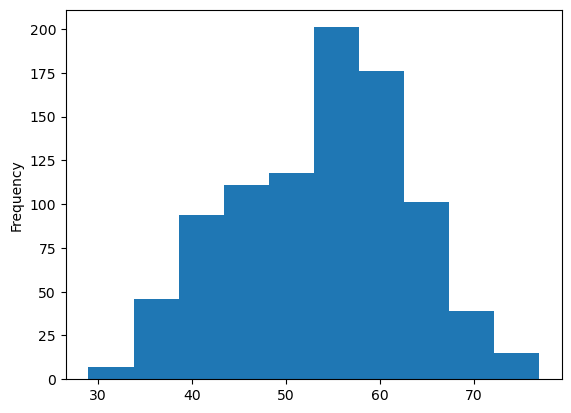

In [6]:
df["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

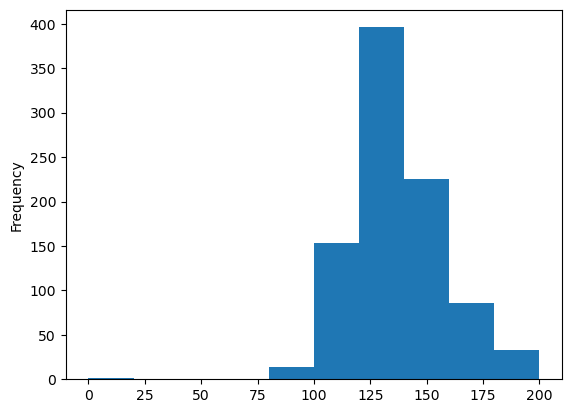

In [7]:
df["trestbps"].plot(kind="hist")

<Axes: ylabel='Frequency'>

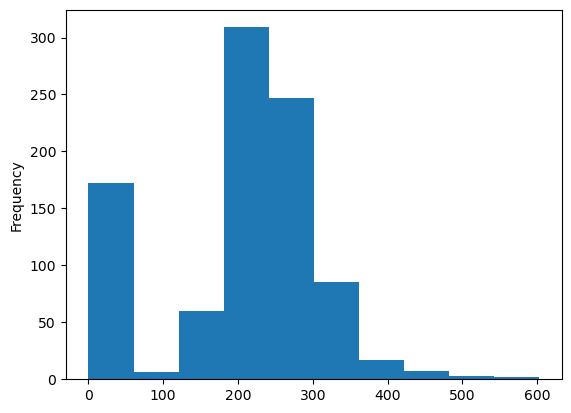

In [8]:
df["chol"].plot(kind="hist")

<Axes: ylabel='Frequency'>

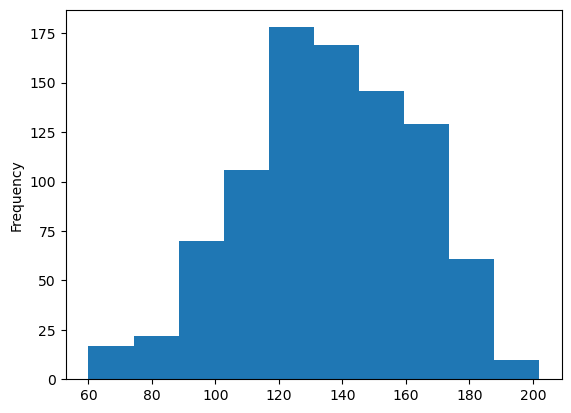

In [9]:
df["thalch"].plot(kind="hist")

<Axes: ylabel='Frequency'>

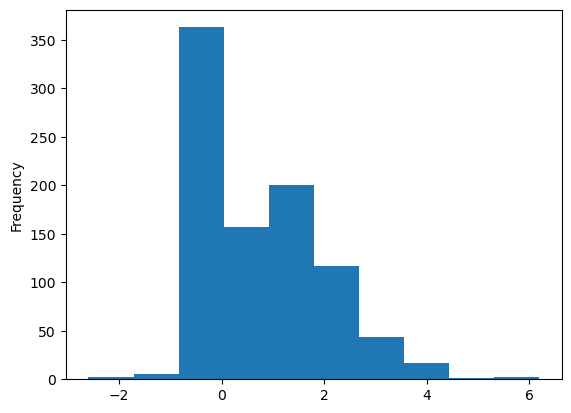

In [10]:
df["oldpeak"].plot(kind="hist")

<Axes: ylabel='Frequency'>

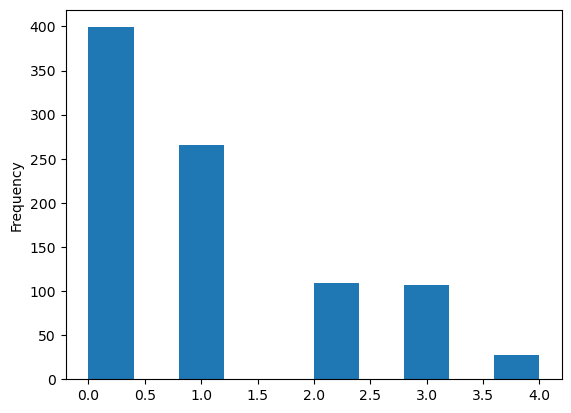

In [11]:
df["num"].plot(kind="hist")

<Axes: >

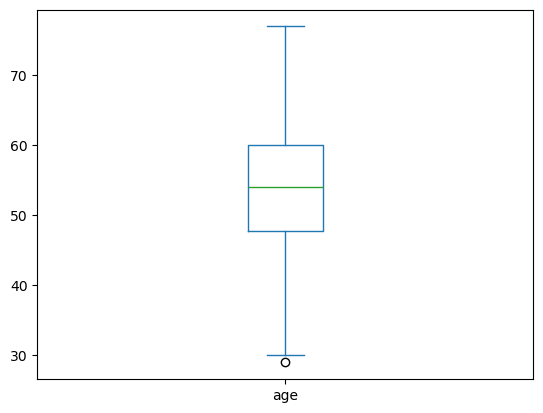

In [12]:
df["age"].plot(kind="box")

<Axes: >

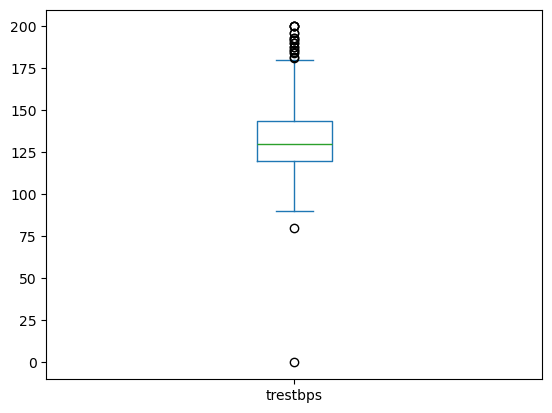

In [13]:
df["trestbps"].plot(kind="box")

In [14]:
Q1 = np.percentile(df["trestbps"],25)
Q3 = np.percentile(df["trestbps"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [15]:
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]>UW]))
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]<LW]))

Number of outliers present in trestbps Column :  20
Number of outliers present in trestbps Column :  2


In [16]:
df[df["trestbps"]>UW] = UW
df[df["trestbps"]<LW] = LW

C:\Users\padal\AppData\Local\Temp\ipykernel_3772\1671690194.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '180.0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df[df["trestbps"]>UW] = UW


In [17]:
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]>UW]))
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]<LW]))

Number of outliers present in trestbps Column :  0
Number of outliers present in trestbps Column :  0


<Axes: >

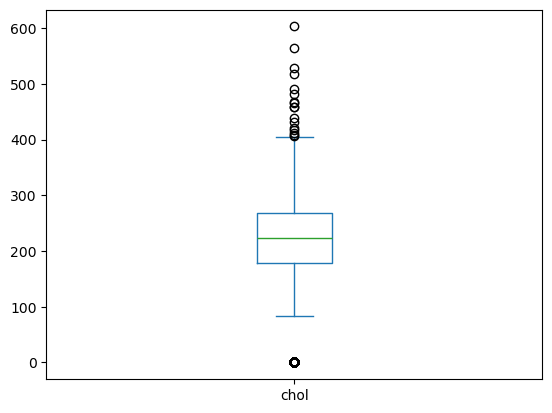

In [18]:
df["chol"].plot(kind="box")

In [19]:
Q1 = np.percentile(df["chol"],25)
Q3 = np.percentile(df["chol"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [20]:
print("Number of outliers present in chol Column : ",len(df[df["chol"]>UW]))
print("Number of outliers present in chol Column : ",len(df[df["chol"]<LW]))

Number of outliers present in chol Column :  17
Number of outliers present in chol Column :  164


In [21]:
df[df["chol"]>UW] = UW
df[df["chol"]<LW] = LW

C:\Users\padal\AppData\Local\Temp\ipykernel_3772\1800697248.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '404.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df["chol"]>UW] = UW
C:\Users\padal\AppData\Local\Temp\ipykernel_3772\1800697248.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '404.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df["chol"]>UW] = UW
C:\Users\padal\AppData\Local\Temp\ipykernel_3772\1800697248.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '404.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[df["chol"]>UW] = UW
C:\Users\padal\AppData\Local\Temp\ipykernel_3772\180

In [22]:
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]>UW]))
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]<LW]))

Number of outliers present in trestbps Column :  0
Number of outliers present in trestbps Column :  0


<Axes: >

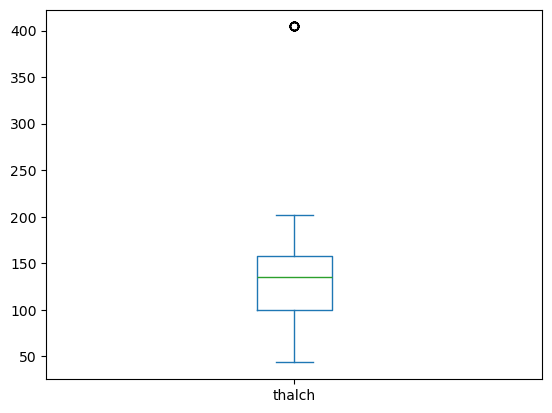

In [23]:
df["thalch"].plot(kind="box")

<Axes: >

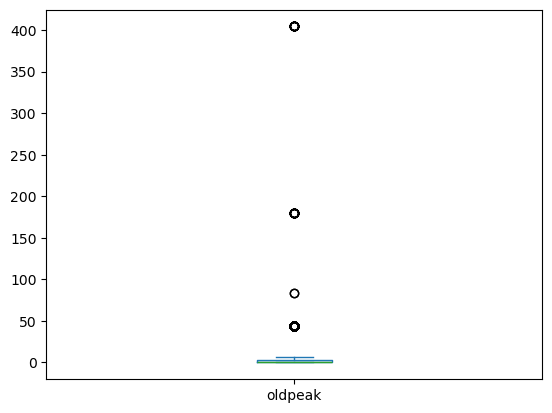

In [24]:
df["oldpeak"].plot(kind="box")

In [25]:
Q1 = np.percentile(df["oldpeak"],25)
Q3 = np.percentile(df["oldpeak"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [26]:
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]>UW]))
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]<LW]))

Number of outliers present in oldpeak Column :  203
Number of outliers present in oldpeak Column :  0


In [27]:
df[df["oldpeak"]>UW] = UW
df[df["oldpeak"]<LW] = LW

In [28]:
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]>UW]))
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]<LW]))

Number of outliers present in oldpeak Column :  0
Number of outliers present in oldpeak Column :  0


<Axes: >

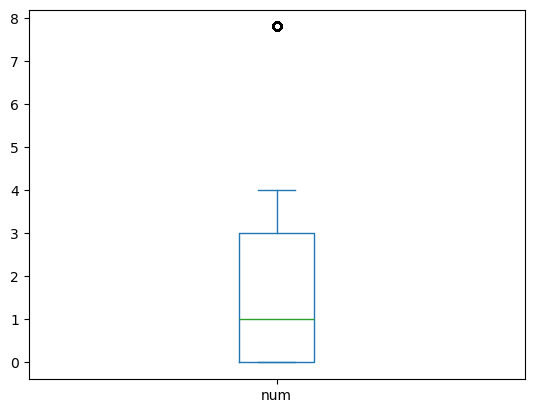

In [29]:
df["num"].plot(kind="box")

# 3. Feature Engineering:

In [30]:
df.duplicated().sum() 
df = df.drop_duplicates()

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df["exang"].value_counts()

exang
False     415
True      253
TURE       22
FALSE      14
7.8125      1
Name: count, dtype: int64

In [33]:
df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False ,})

C:\Users\padal\AppData\Local\Temp\ipykernel_3772\2725435938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False ,})


In [34]:
df["exang"].value_counts()

exang
False     429
True      275
7.8125      1
Name: count, dtype: int64

In [35]:
df = df[df['exang'].isin([True, False])]

In [36]:
df["exang"].value_counts()

exang
False    429
True     275
Name: count, dtype: int64

In [37]:
df_cat = df.select_dtypes(include=['object', 'bool'])

In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE_cat = df_cat.apply(LE.fit_transform)
LE_cat = pd.DataFrame(LE_cat)
LE_cat.columns = list(df_cat)
LE_cat

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0
3,1,3,0,0,0,1,0
4,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...
899,1,0,0,1,1,0,2
902,1,0,1,2,1,1,1
904,1,0,0,2,1,1,2
906,1,2,1,2,1,0,0


In [39]:
df_num = df.select_dtypes(include=['number']).drop('num', axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_num = SS.fit_transform(df_num)
SS_num = pd.DataFrame(SS_num)
SS_num.columns = list(df_num)
SS_num

,age,trestbps,chol,thalch,oldpeak
0,1.074566,0.679962,-0.193241,0.413018,1.309150
1,-1.332213,0.114064,-0.782338,-0.285936,-0.855698
2,0.418172,0.397013,-0.998339,0.335357,-0.479203
3,-0.128824,-0.847963,-1.116159,1.966248,-0.855698
4,0.418172,-1.300681,-0.821611,-0.518920,0.556160
...,...,...,...,...,...
699,1.293364,0.170654,0.101307,0.024710,2.909256
700,0.965167,1.528809,0.219126,-1.217874,1.968017
701,0.965167,1.868347,-1.430343,-0.751905,1.968017
702,0.308773,0.623372,-0.684155,-1.334366,-0.017996


In [41]:
LE_cat = LE_cat.reset_index(drop=True)
SS_num = SS_num.reset_index(drop=True)

In [42]:
df_new = pd.concat([LE_cat,SS_num],axis=1)
df_new

,sex,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalch,oldpeak
0,1,3,1,0,0,0,0,1.074566,0.679962,-0.193241,0.413018,1.309150
1,1,1,0,1,0,1,0,-1.332213,0.114064,-0.782338,-0.285936,-0.855698
2,1,0,0,1,0,1,0,0.418172,0.397013,-0.998339,0.335357,-0.479203
3,1,3,0,0,0,1,0,-0.128824,-0.847963,-1.116159,1.966248,-0.855698
4,1,0,0,1,1,1,0,0.418172,-1.300681,-0.821611,-0.518920,0.556160
...,...,...,...,...,...,...,...,...,...,...,...,...
699,1,0,0,1,1,0,2,1.293364,0.170654,0.101307,0.024710,2.909256
700,1,0,1,2,1,1,1,0.965167,1.528809,0.219126,-1.217874,1.968017
701,1,0,0,2,1,1,2,0.965167,1.868347,-1.430343,-0.751905,1.968017
702,1,2,1,2,1,0,0,0.308773,0.623372,-0.684155,-1.334366,-0.017996


# 4. Decision Tree Classification:

In [43]:
X = df_new
Y = df["num"]

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

In [46]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [51]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [67]:
print("Accuracy Score :",accuracy_score(Y_test,Y_pred_test))
print("Precision Score :",precision_score(Y_test,Y_pred_test, average='weighted'))
print("Recall Score :",recall_score(Y_test,Y_pred_test, average='weighted'))
print("F1_score Score :",f1_score(Y_test,Y_pred_test, average='weighted'))

Accuracy Score : 0.48226950354609927
Precision Score : 0.5132646869192552
Recall Score : 0.48226950354609927
F1_score Score : 0.49621879731165514


In [68]:
from sklearn.preprocessing import label_binarize

In [69]:
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))

In [87]:
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}
n_class = y_test_bin.shape[1]

for i in range(n_class):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_class
roc_auc["macro"] = auc(all_fpr, mean_tpr)

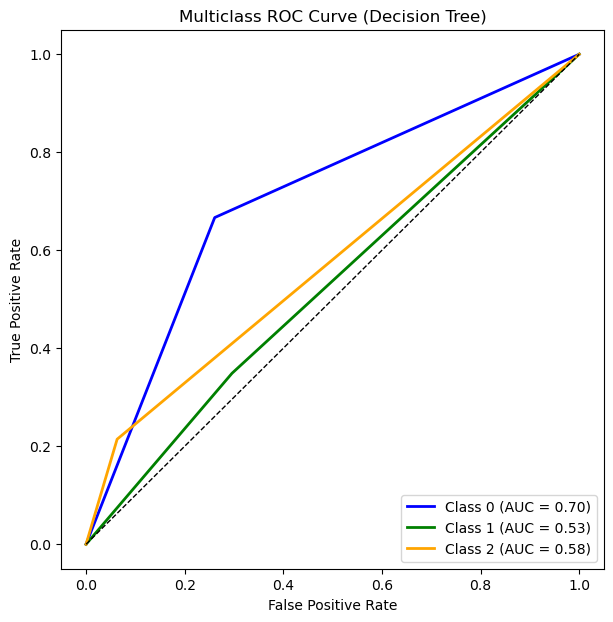

In [83]:
plt.figure(figsize=(7, 7))
colors = ["blue", "green", "orange"]
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (Decision Tree)")
plt.legend(loc="lower right")
plt.show()

In [88]:
auc_ovr_macro = roc_auc_score(y_test_bin, y_pred_proba, multi_class="ovr", average="macro")
auc_ovr_weighted = roc_auc_score(y_test_bin, y_pred_proba, multi_class="ovr", average="weighted")

In [89]:
print("OvR Macro ROC-AUC:", auc_ovr_macro)
print("OvR Weighted ROC-AUC:", auc_ovr_weighted)

OvR Macro ROC-AUC: 0.5918749101315258
OvR Weighted ROC-AUC: 0.6222575333080542


# 5. Hyperparameter Tuning:

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 6. Model Evaluation and Analysis:

In [56]:
model = DecisionTreeClassifier(random_state=42)

In [57]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

In [58]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [59]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
0.5931731984829329


In [60]:
best_params = grid_search.best_params_

In [61]:
from sklearn.tree import DecisionTreeClassifier
best_model = DecisionTreeClassifier(**best_params, random_state=42)

In [67]:
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [68]:
Y_best_pred_test = best_model.predict(X_test)

In [69]:
print("Accuracy Score :",accuracy_score(Y_test,Y_best_pred_test))
print("Precision Score :",precision_score(Y_test,Y_best_pred_test, average='weighted'))
print("Recall Score :",recall_score(Y_test,Y_best_pred_test, average='weighted'))
print("F1_score Score :",f1_score(Y_test,Y_best_pred_test, average='weighted'))

Accuracy Score : 0.6382978723404256
Precision Score : 0.6260401192260461
Recall Score : 0.6382978723404256
F1_score Score : 0.6274242572801254


C:\Users\padal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

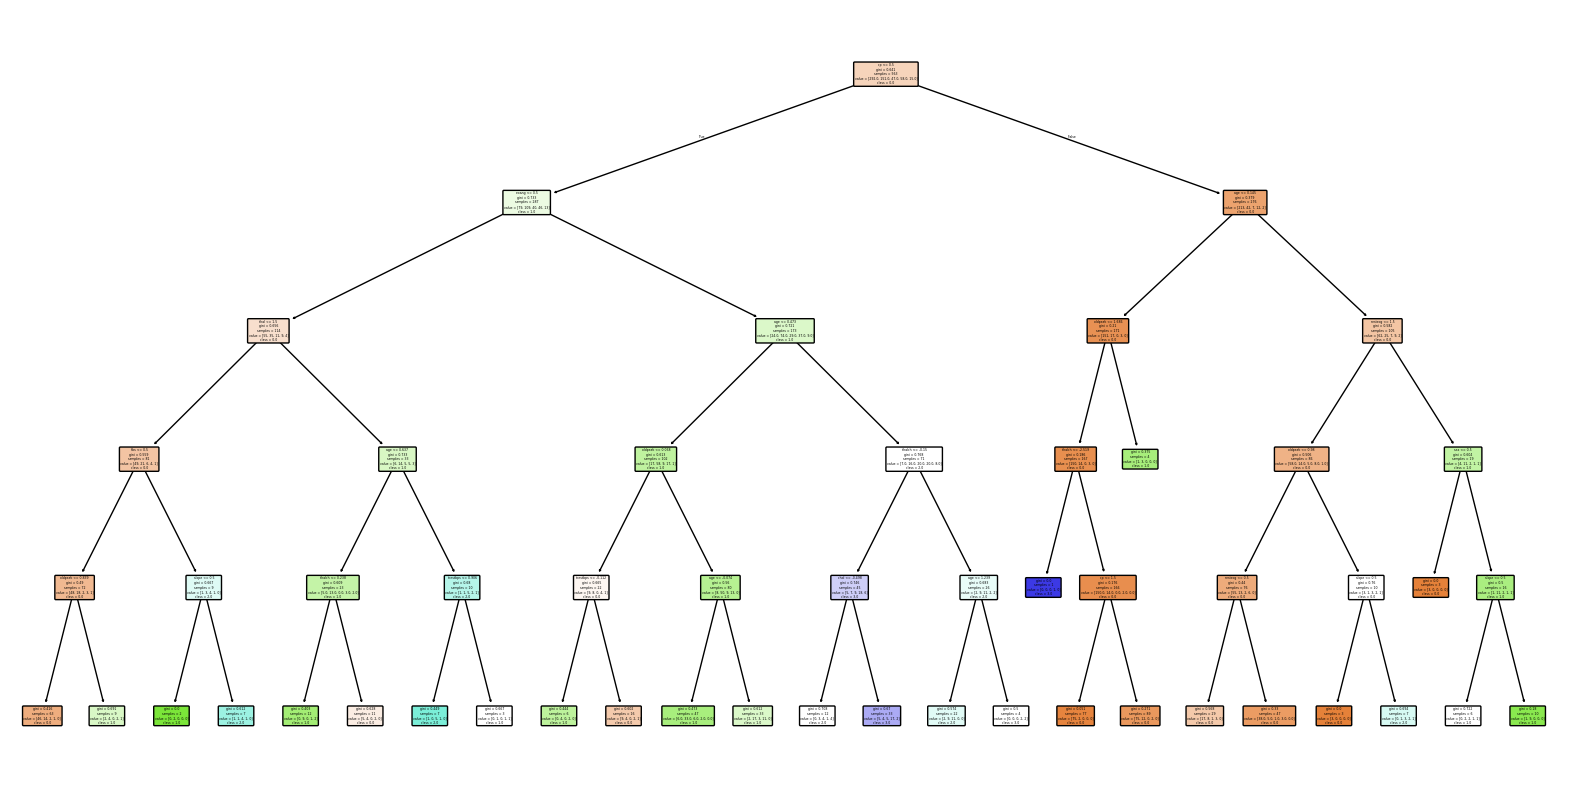

In [72]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in sorted(Y.unique())], rounded=True)
plt.show()

# Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans) 1.Max Depth :- Sets the maximum depth of the tree.
     2.Min Samples :- Minimum number of samples required to split an internal node.
     3.Max Features :- Number of features to consider when looking for the best split.
     4.Criterion :- Function to measure the quality of a split (Gini and Entropy).

### 2. What is the difference between the Label encoding and One-hot encoding?
Ans) Label encoding assigns each category a unique integer value whereas One-hot encoding Creates a new binary column for each category.